# **Brief 5 - Reconnaissance écriture manuelle**
# Régression logistique - descente de gradien  

keywords: numpy, scikit-learn, logistic regression, descente de gradient, optimisation.

## **0) Description**  

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators.
Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants
* to understand how the algorithm works,
* to compare the performance with several classification algorithms 
* to observe the convergence of a grandient descent algorithm for further investigation.

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators. Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

## **1) Get and understand your data**  
### a) What is the type of the data ?  
Chaques images est une matrice de 8 x 8. Les éléments de la matrice sont des nombres flotants codant la
couleurs, ou le niveau de gris, avec lequel l'élèment est affichée. Chaque image à 64 pixels.
Chaque image représente un chiffre de 0 à 9 écrit sous forme manuscrite. Il y a 1797 images.

In [127]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print("Le jeux de données comprend {} enregistrement. Chaque enregistrement est une matrices de {} éléments. \n"\
      .format(digits.data.shape[0],digits.data.shape[1]))
print("Étiquettes du jeux de données (les 100 premières): ",digits.target[:100])

Le jeux de données comprend 1797 enregistrement. Chaque enregistrement est une matrices de 64 éléments. 

Étiquettes du jeux de données (les 100 premières):  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


<Figure size 432x288 with 0 Axes>

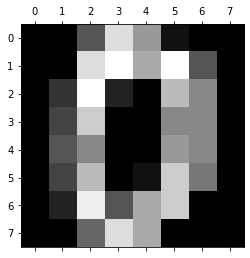

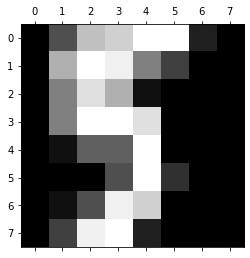

In [129]:
# Show one data

plt.gray() 
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[15]) 
plt.show()

<Figure size 432x288 with 0 Axes>

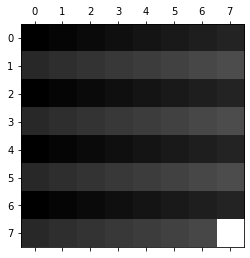

In [130]:
# étude de matshow

plt.gray() 
a=[[0.,1.,2.,3.,4.,5.,6.,7.], [8.,9.,10.,11.,12.,13.,14.,15.], [0.,1.,2.,3.,4.,5.,6.,7.],\
   [8.,9.,10.,11.,12.,13.,14.,15.],[0.,1.,2.,3.,4.,5.,6.,7.], [8.,9.,10.,11.,12.,13.,14.,15.], \
   [0.,1.,2.,3.,4.,5.,6.,7.],[8.,9.,10.,11.,12.,13.,14.,50.]]
plt.matshow(np.array(a)) 
plt.show()
# matshow s'adapte au valeurs qui sont des float, et créer une échelle. La plus grande des valeurs ressort
#  en blanc la plus faible en noir


X Shape:  (1797, 8, 8)
Xdata Shape:  (1797, 64)
Y shape:  (1797,)
digits.target_name [0 1 2 3 4 5 6 7 8 9]
2.8284271247461903
<class 'sklearn.utils.Bunch'>


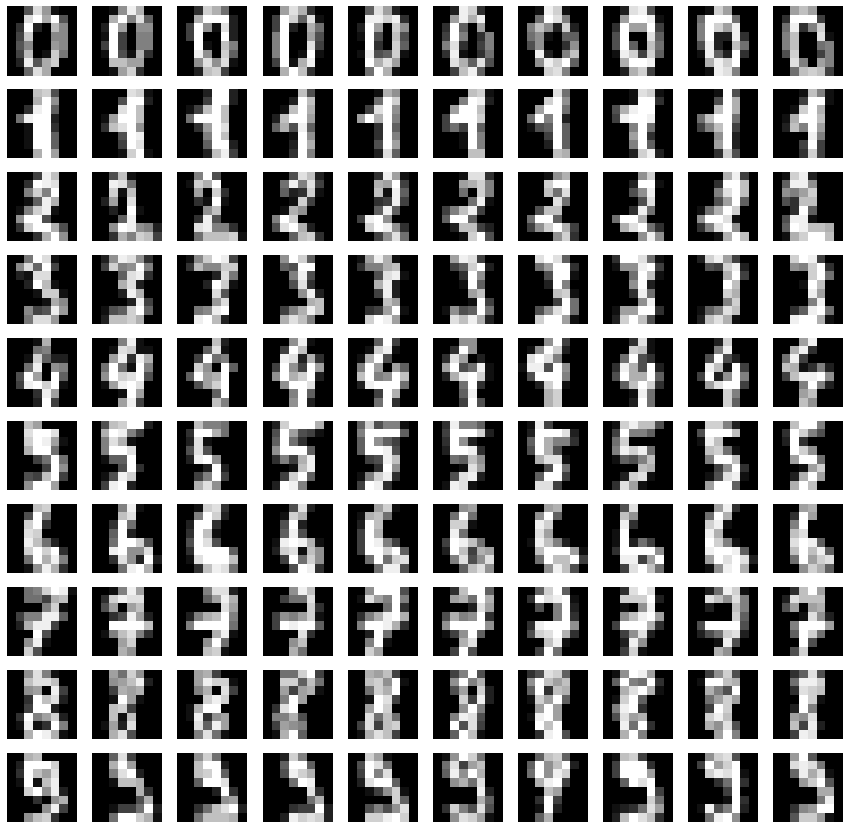

In [134]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target
Xdata= digits.data
# print(Xdata)
# print(X)

# ----------------------------- ??????????????????????????? ----------------------------------------
#
# Xdata est un tableau à 3 dimensions, X en a 2 mais le tableau est identiques. Je ne comprend pas
#  la différence entre les 2 jeux de données.
#
# ----------------------------- ??????????????????????????? ----------------------------------------
# Réponse possible: les images sont organisées en matrice de 8x8, les datas sont un tableau de 64 éléments 
# ----------------------------- !!!!!!!!!!!!!!!!!!!!!!!!!!! ----------------------------------------

n_digits = np.unique(Y)
M = 10
#dim = int(np.sqrt(X.shape[1]))
print("X Shape: ",X.shape)
print("Xdata Shape: ",Xdata.shape)
print("Y shape: ",Y.shape)
print("digits.target_name",digits.target_names)

# ----------------------------- ??????????????????????????? ----------------------------------------
# Quel intérêt de prendre la racine carré de 8 ?
# Suppression de Dim
# ----------------------------- ??????????????????????????? ----------------------------------------
print(np.sqrt(X.shape[1]))
#print("dim",dim)
#print(digits.DESCR)
print(type(digits))

fig, axs = plt.subplots(len(n_digits), M, figsize=(15, 15))
for i, d in enumerate(n_digits):
    for j in range(M):
        #print(X[Y==d][j])
        axs[i,j].imshow(X[Y == d][j]) # permet d'afficher sur une même ligne 'M' image représentant le même chiffre
        axs[i,j].axis('off')


## **2) Prepare your ML algorithm**

How to evaluate classification algorithms ?
* https://scikit-learn.org
* wikipedia
* towards data science
* ...

Write the equation of the **precision** and **recall** score and explicit what each terms represents.  
<span style="color: ##0000FF">
VP/FP vrai/faux positif    
VN/FN vrai/faux négatif  
precision = VP(VP+FP)  
rappel= VP/(VP+FN)  
https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel  
</span>    
  
explain the purpose of the training set ?  
<span style="color: ##0000FF">
jeux d'entrainement pour apprentissage.  
</span>  
explain the purpose of the testing set ?  
<!--* the randomization of the data ?-->
<span style="color: #0000FF">
permet de vérifier si l'apprentissage permet de prédire sur des données "nouvelles"
</span>  


What does the `train_test_split` function in sklearn do ?  
<span style="color: #0000FF">
Cette fonction permet de séparer un jeux de donnée en un jeu de données utiliser pour **l'apprentissage** et un jeux de données pour **tester** l'efficacité de cet apprentissage.
</span>

use the `train_test_split` function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).
<span style="color: #0000FF">
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Y, test_size=0.2, random_state=42)
</span>  
  
check that the ratio is correct.  
<span style="color: #0000FF">
Le score obtenu est de 99.72 % de bonne prédictions pour test_size = 0.2. C'est le meilleur taux obtenu. 
</span>  



In [135]:
import sklearn as sk
from sklearn.model_selection import train_test_split

# On split le jeux de données
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Y, test_size=0.2, random_state=42)
#print("shape X_train",X_train.shape)
#print(X_train)
print("{} données pour l'entrainement, {} données pour le test.".format(len(X_train),len(X_test)))

Y_train0= np.zeros(len(Y_train))
#print("Y_train0:",Y_train0)
Y_train0[Y_train == 0]= 1
#print("Y_train0 aprés:",Y_train0)

Y_train1= np.zeros(len(Y_train))
#print("Y_train1:",Y_train1)
Y_train1[Y_train == 1]= 1
#print("Y_train1 aprés:",Y_train1)

Y_train2= np.zeros(len(Y_train))
#print("Y_train2:",Y_train2)
Y_train2[Y_train == 2]= 1
#print("Y_train2 aprés:",Y_train2)

Y_train3= np.zeros(len(Y_train))
Y_train3[Y_train == 3]= 1

Y_train4= np.zeros(len(Y_train))
Y_train4[Y_train == 4]= 1

Y_train5= np.zeros(len(Y_train))
Y_train5[Y_train == 5]= 1

Y_train6= np.zeros(len(Y_train))
Y_train6[Y_train == 6]= 1

Y_train7= np.zeros(len(Y_train))
Y_train7[Y_train == 7]= 1
Y_test7= np.zeros(len(Y_test))
Y_test7[Y_test == 7]= 1

#Y_train8= np.zeros(len(Y_train))
#Y_train8[Y_train == 8]= 1
Y_train8 = np.array([1 if Y_train[i]==8 else 0 for i in range(len(Y_train))])
Y_test8 = np.array([1 if Y_test[i]==8 else 0 for i in range(len(Y_test))])
#print(Y_train8)

Y_train9= np.zeros(len(Y_train))
Y_train9[Y_train == 9]= 1


1437 données pour l'entrainement, 360 données pour le test.


## **3) Predict Digits**

In the dataset we have multiple labels. Therefore, to start we will predict in a binary case. It means that that we will predict only if an image is a given digit (for exemple `7`) or not.

To do so, we will a **logistic regression** algorithm plus (at least) **two** others of your choices. 

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the inference time for each algorithm

How many input data the algorithms needs the be efficient (and why) ? 

Compare the performance on the training set. What do you observe ?


In [144]:
#---------------------------------------------------------------------------------------
#
# Régression logistique pour le chiffre 7
#
#---------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

lregr7 = LogisticRegression(solver='liblinear') # Instance de l'objet LogisticRegression

#print("shape X_train",X_train.shape)
#print(X_train)
lregr7.fit(X_train, Y_train7)

#--------------------------- ?????????????????? --------------------------------
# Rechercher la signification de ces données
#print("{} - {}".format(lregr7.coef_,lregr7.intercept_))
#--------------------------- ?????????????????? --------------------------------

# on teste sur les données de.... test :)

predict7 = lregr7.predict(X_test)

#------------------------------------------------------------------------------
#
# A FAIRE AFFICHER PREDICTION ET NOMBRE REEL PAR PAR EXEMPLE UN 2 EST RECONNU COMME 7
#
#------------------------------------------------------------------------------
print(predict7[:50])
print(Y_test[:50])

#------------------------------------------------------------------------------
#
# Statistique: accuracy,.....
#
#------------------------------------------------------------------------------

print("Le score obtenu est de {} % de bonne prédictions".format(round(lregr7.score(X_test, Y_test7)*100,2)))
# Quelque valeur obtenu pour la précision (accuracy)
# Le score obtenu est de 99.33 % de bonne prédictions pour test_size=0.33 qq confusion 2 et 7
# Le score obtenu est de 99.44 % de bonne prédictions pour test_size = 0.1 (l'erreur du '2' est corrigée)
# Le score obtenu est de 99.72 % de bonne prédictions pour test_size = 0.2 (l'erreur du '2' est corrigée)
# Le score obtenu est de 99.17 % de bonne prédictions pour test_size = 0.4  qq confusion 2 et 7
# Le score obtenu est de 99.44 % de bonne prédictions pour test_size = 0.5 
# Le score obtenu est de 99.35 % de bonne prédictions pour test_size = 0.6
# Le score obtenu est de 98.73 % de bonne prédictions pour test_size = 0.7 des 7 non détecté
# Le score obtenu est de 99.03 % de bonne prédictions pour test_size = 0.8
# Le score obtenu est de 98.56 % de bonne prédictions pour test_size = 0.85
# Le score obtenu est de 98.52 % de bonne prédictions pour test_size = 0.9
# partager l'échantillon en 2 semble être un bon compromis

#--------------------------- ?????????????????? --------------------------------
# Rechercher la signification de ces données
#print(lregr7.predict_proba(X_test))
#--------------------------- ?????????????????? --------------------------------
print(classification_report(Y_test7,predict7))


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]
Le score obtenu est de 99.72 % de bonne prédictions
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       326
         1.0       1.00      0.97      0.99        34

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360



## **4) Multi-class classification**

Fit now the algorithm in the multiclass case (ie using all the the classes (target)).

Show the result with
* the confusion matrix (see sklearn.metrics.plot_confusion_matrix)
* the classification report (see sklearn.metrics.classification_report)



In [145]:
# Plusieurs solver existe... A FAIRE TESTER LES AUTRES
lregrall = LogisticRegression(solver='liblinear') # Instance de l'objet LogisticRegression

#print("shape X_train",X_train.shape)
#print(X_train)
lregrall.fit(X_train, Y_train)

# on teste sur les données de.... test :)
predictall = lregrall.predict(X_test)

#------------------------------------------------------------------------------
#
# A FAIRE AFFICHER PREDICTION ET NOMBRE REEL PAR PAR EXEMPLE UN 2 EST RECONNU COMME 7
#
#------------------------------------------------------------------------------
print(predictall[:50])
print(Y_test[:50])
# 1 seul erreur sur les 50 premiers: 8 à la place d'un 9

#------------------------------------------------------------------------------
#
# Statistique: accuracy,.....
#
#------------------------------------------------------------------------------

print("Le score obtenu est de {} % de bonne prédictions".format(round(lregrall.score(X_test, Y_test)*100,2)))
print(classification_report(Y_test7,predict7))


[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]
Le score obtenu est de 96.11 % de bonne prédictions
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       326
         1.0       1.00      0.97      0.99        34

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360





**5) Gradient descent ?**

We want to observe the convergence of the performance.
To do so, we want to implement our own version of the Logistic regression inference algorithm.

> veille
What algorithm uses sklearn to estimate the model parameters for the logistic regression ?
* What are the keys equations we need to implement the algorithm ?
* what is the difference between the gradient descent and the stochastic gradient descent ?

Write the *pseudo-code* of the algorithm to be sure to understand all the different steps.
https://fr.wikipedia.org/wiki/Pseudo-code

Implement the gradient descent for the logistic regression.


Show the convergence of the performance results with two graphics:
* the **precision** score on testing set AND training set 
* the **recall** score on testing set AND training set 


What is the impact of the learning rate on the convergence ?
What difference do you observe on the results between the training set and testing set


keywords:  numpy, scikit-learn, logistic regression, descente de gradient, optimisation.

# Description

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators.
Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants
* to understand how the algorithm works,
* compare the performance with several classification algorithms 
* to observe the convergence of a grandient descent algorithm for further investigation.


# Proposed Plan

**1) Get and understand your data**

git clone the repository and run the given notebook in https://github.com/dtrckd/simplon_datai_2020/blob/master/brief_3/.

what is the type of the data ?

How many pixel has one data instance ?

What is the type of data of one pixel ? what does it represents ?


**2) Prepare your ML algorithm**

> Veille
How to evaluate classification algorithms ?
* https://scikit-learn.org
* wikipedia
* towards data science
* ...

> Questions
* Write the equation of the **precision** and **recall** score and explicit what each terms represents.
* explain the purpose of the training set ?
* explain the prpose of the testing set ?
<!--* the randomization of the data ?-->


What does the `train_test_split` function in sklearn do ?

use the `train_test_split` function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).

check that the ratio is correct.

**3) Predict Digits**

In the dataset we have multiple label. Therefore, to start we will predict in a binary case. It meansthat that we will predict only if an image is a given digit (for exemple `7`) or not.

To do that we will a **logistic regression** algorithm plus (at least) **two** others of your choices. 

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the inference time for each algorithm

How many input data the algorithms needs the be efficient (and why) ? 

**4) Gradient descent ?**

We want to observe the convergence of the performance.
To do so, we want to implement our own version of the Logistic regression inference algorithm.

> veille
What algorithm uses sklearn to estimate the model parameters for the logistic regression ?
* What are the keys equations who need to implement the algorithm ?
* what is the difference betwee the gradient descent and stochastic gradient descent ?

Implement the gradient descent for the logistic regression.


Show the convergence of the performance results with two graphics:
* the **precision** score on testing set AND training set 
* the **recall** score on testing set AND training set 


What is the impact of the learning rate on the convergence ?
What difference do you observe on the results between the training set and testing set


# **divers à reclasser**

In [79]:
 # Affiche la doc de la méthode numpy linspace
np.linspace?
"""
Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : bool, optional
    If True, return (`samples`, `step`), where `step` is the spacing
    between samples.
dtype : dtype, optional
    The type of the output array.  If `dtype` is not given, infer the data
    type from the other input arguments.

    .. versionadded:: 1.9.0

axis : int, optional
    The axis in the result to store the samples.  Relevant only if start
    or stop are array-like.  By default (0), the samples will be along a
    new axis inserted at the beginning. Use -1 to get an axis at the end.

    .. versionadded:: 1.16.0

Returns
-------
samples : ndarray
    There are `num` equally spaced samples in the closed interval
    ``[start, stop]`` or the half-open interval ``[start, stop)``
    (depending on whether `endpoint` is True or False).
step : float, optional
    Only returned if `retstep` is True

    Size of spacing between samples.


See Also
--------
arange : Similar to `linspace`, but uses a step size (instead of the
         number of samples).
geomspace : Similar to `linspace`, but with numbers spaced evenly on a log
            scale (a geometric progression).
logspace : Similar to `geomspace`, but with the end points specified as
           logarithms.

Examples
--------
>>> np.linspace(2.0, 3.0, num=5)
array([2.  , 2.25, 2.5 , 2.75, 3.  ])
>>> np.linspace(2.0, 3.0, num=5, endpoint=False)
array([2. ,  2.2,  2.4,  2.6,  2.8])
>>> np.linspace(2.0, 3.0, num=5, retstep=True)
(array([2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)

Graphical illustration:

>>> import matplotlib.pyplot as plt
>>> N = 8
>>> y = np.zeros(N)
>>> x1 = np.linspace(0, 10, N, endpoint=True)
>>> x2 = np.linspace(0, 10, N, endpoint=False)
>>> plt.plot(x1, y, 'o')
[<matplotlib.lines.Line2D object at 0x...>]
>>> plt.plot(x2, y + 0.5, 'o')
[<matplotlib.lines.Line2D object at 0x...>]
>>> plt.ylim([-0.5, 1])
(-0.5, 1)
>>> plt.show()
File:      ~/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py
Type:      function
"""

In [82]:
a=np.linspace(0,64,64, dtype= int)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64]


In [85]:
#np.arange?
a= np.arange(0,64,1,dtype= int)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


NameError: name 'digit' is not defined